In [67]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import re
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

# DATA MODELING

### 1: Đọc file "historical_quotes.csv"

In [68]:
# read historical quotes data (cleaned) with index as first column
df = pd.read_csv('data-csv/historical_quotes.csv', index_col=0)
print(df.shape)
df.head()

(3263, 10)


,date,open price,high price,low price,close price,AVG price,adjusted close price,volume,value fluctuation,rate fluctuation
0,2022-11-29,11.5,11.5,10.3,11.5,11.23,11.5,1589500,1.0,9.52
1,2022-11-28,8.7,10.5,8.7,10.5,10.42,10.5,103700,0.9,9.38
2,2022-11-25,9.4,9.6,9.4,9.6,9.60,9.6,289900,0.8,9.09
3,2022-11-24,8.0,8.8,7.4,8.8,8.17,8.8,751400,0.8,10.00
4,2022-11-23,8.4,8.8,8.0,8.0,8.30,8.0,642500,-0.4,-4.76


### 2: Phân tích dữ liệu và mô hình hóa

**Câu hỏi:** Dự đoán lượng cổ phiếu đóng (close price)
- Các đặc trưng gồm có: open price, close price, high price, low price, volumn [tìm hiểu thêm tại đây](https://www.ssi.com.vn/tin-tuc/tin-tuc-chung/kien-thuc-co-ban-ve-thi-truong-chung-khoan)
- Ta dự đoán close price dựa trên các đặc trưng trên, lý do có thể hiểu nôm na là: *_Giá đóng cửa hôm nay chính là Giá tham chiếu ngày mai (Giá đóng cửa chính là Giá giao dịch thành công cuối cùng của ngày). Giá đóng cửa ngày mai lại là Giá tham chiếu ngày kia... Cứ như thế suốt tạo ra 1 sự liền mạch về Giá thị trường._*

**Mô hình:**: Ở đây nhóm chúng tôi sẽ sử dụng mô hình hồi quy để dự đoán giá đóng cửa (dựa trên các đặc trưng trên). Và chúng tôi sẽ sử dụng hai mô hình đặc trưng của hồi quy là Linear Regression và Logistic Regression.
- Mô hình Linear Regression: Mô hình này sẽ tìm ra một đường thẳng tối ưu để phù hợp với dữ liệu. Đường thẳng này được gọi là đường hồi quy. Đường hồi quy này sẽ được sử dụng để dự đoán giá đóng cửa của ngày hôm sau.
- Mô hình Logistic Regression: Mô hình này sẽ tìm ra một đường cong tối ưu để phù hợp với dữ liệu. Đường cong này được gọi là đường hồi quy. Đường hồi quy này sẽ được sử dụng để dự đoán giá đóng cửa của ngày hôm sau.

Coefficients:  [-8.10216323e-14  8.79715138e-14 -1.01084317e-14  1.00000000e+00
  2.16840434e-19]
Mean squared error: 0.00
Coefficient of determination: 1.00


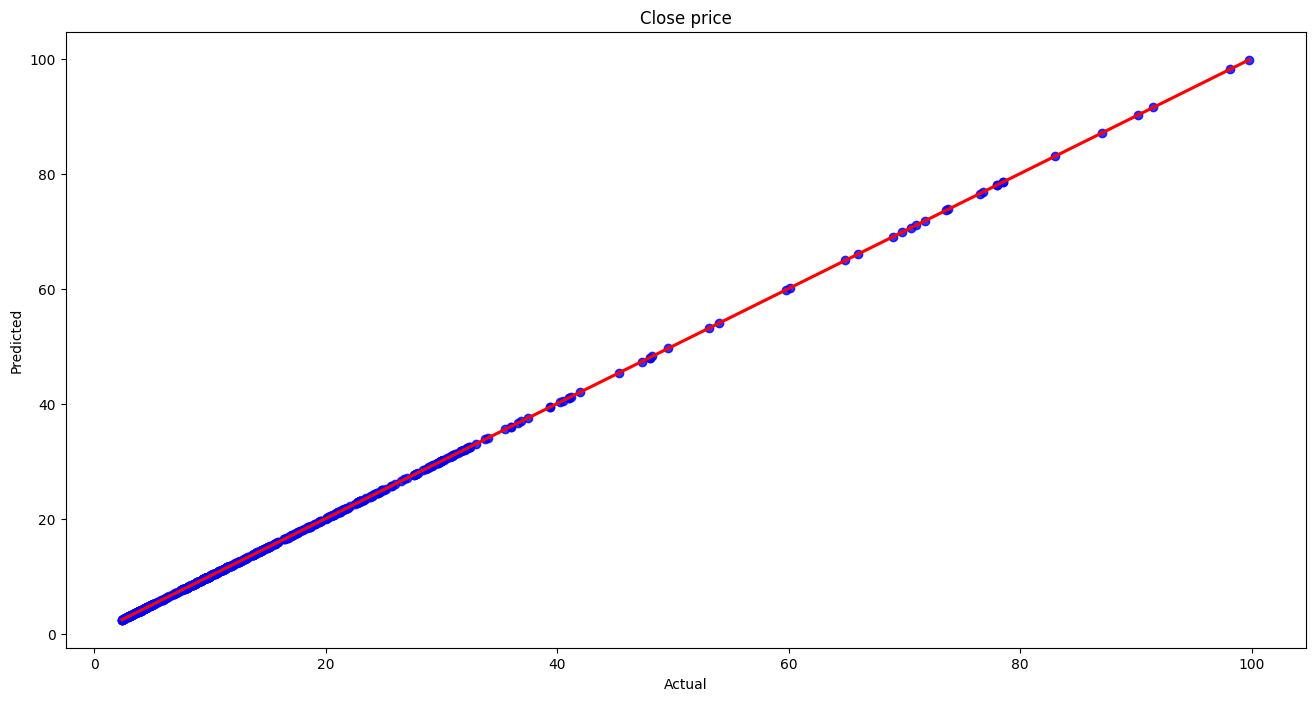

In [69]:
# predict using linear regression
X = df[["open price","high price", "low price", "close price", "volume"]]
y = df["close price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# create model
model = LinearRegression()
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# evaluate
print('Coefficients: ', model.coef_)

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# visualize prediction vs actual
plt.figure(figsize=(16, 8))
sns.regplot(x=y_test, y=y_pred, data=result, fit_reg=True, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('Close price')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()



/home/hariknguyen/.project/data-sience-final-term-case-study/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Coefficients:  [[ 5.92865949e-07  5.92647474e-07  5.93059661e-07  5.92813333e-07
  -1.90912120e-05]
 [ 2.01509451e-08  1.99324544e-08  2.03446770e-08  2.00983304e-08
  -1.90761947e-05]
 [-2.57977138e-09 -2.79827575e-09 -2.38602236e-09 -2.63238519e-09
  -1.90649978e-05]
 ...
 [-2.71733910e-08 -2.78147225e-08 -2.62688879e-08 -2.68502968e-08
   7.75349236e-06]
 [-2.76497297e-08 -2.87085953e-08 -2.71453674e-08 -2.77698611e-08
   7.81618872e-06]
 [-3.96134549e-08 -4.07277847e-08 -3.80846917e-08 -3.94751711e-08
   8.04966628e-06]]
Mean squared error: 157166244100588.09
Coefficient of determination: -3282.95


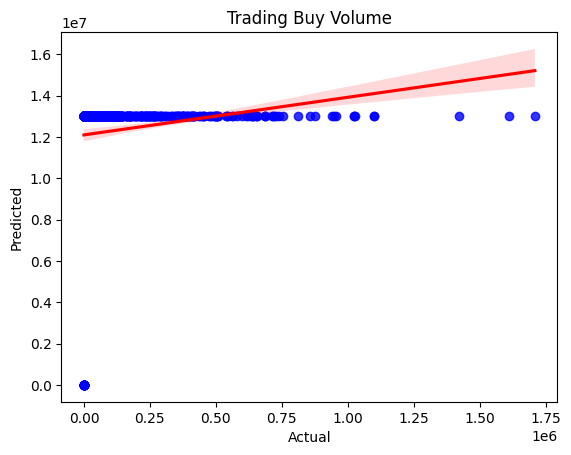

In [72]:
# predict trading_buy_volume according to open price, high price, low price, close price with linear regression
X = df[["open price","high price", "low price", "close price", "volume"]]
y = df["volume"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# create model
model = LogisticRegression()
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# evaluate
print('Coefficients: ', model.coef_)

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# visualize
sns.regplot(x=y_test, y=y_pred, data=df, fit_reg=True, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('Trading Buy Volume')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

